In [1]:
import pandas as pd
import numpy as np

### Test 1

In [2]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [3]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]

In [4]:
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [5]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [6]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [7]:
signal = signal_df["BTCUSDT"]>signal_df["ETHUSDT"]

In [8]:
portfolio_ret = ret_df["ETHUSDT"].copy()
portfolio_ret[signal] = ret_df["BTCUSDT"][signal]

In [9]:
portfolio_ret_cum = (portfolio_ret+1).cumprod()

In [10]:
wide_df

close         
ticker                BTCUSDT  ETHUSDT
time                                  
2019-09-17 08:00:00  10187.82   207.84
2019-09-18 08:00:00  10156.99   210.21
2019-09-19 08:00:00  10244.29   220.24
2019-09-20 08:00:00  10168.59   218.03
2019-09-21 08:00:00   9986.39   215.05
...                       ...      ...
2021-01-24 08:00:00  32259.90  1392.51
2021-01-25 08:00:00  32254.20  1317.88
2021-01-26 08:00:00  32467.77  1365.97
2021-01-27 08:00:00  30366.15  1239.03
2021-01-28 08:00:00  31120.96  1282.96

[500 rows x 2 columns]

In [103]:
index_cum_ret = (ret_df + 1).cumprod()

In [104]:
single_ret = pd.concat([ret_df,portfolio_ret],axis=1)
cum_ret = pd.concat([index_cum_ret,portfolio_ret_cum],axis=1)

In [105]:
single_ret.columns = ["BTCUSDT","ETHUSDT","portfolio_ret"]
cum_ret.columns = ["BTCUSDT","ETHUSDT","portfolio_ret"]

<AxesSubplot:xlabel='time'>

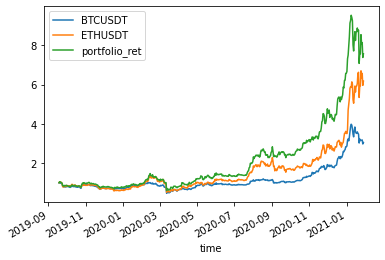

In [106]:
cum_ret.plot()

In [107]:
single_ret.mean()/single_ret.std()

BTCUSDT          0.077940
ETHUSDT          0.097657
portfolio_ret    0.113496
dtype: float64

In [1]:
0.113496 * (365 ** 0.5)

2.1683380354179094

### Test 2

In [7]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [8]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT","LTCUSDT"])]

In [9]:
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [10]:
signal_df = wide_df.pct_change(20).shift(1)
ret_df = wide_df.pct_change(1)

In [11]:
signal_df.columns = ["BTCUSDT","ETHUSDT","LTCUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT","LTCUSDT"]

In [12]:
max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)

In [13]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [15]:
(port_ret+1).cumprod()

time
2019-09-17 08:00:00    1.000000
2019-09-18 08:00:00    1.000000
2019-09-19 08:00:00    1.000000
2019-09-20 08:00:00    1.000000
2019-09-21 08:00:00    1.000000
                         ...   
2021-01-24 08:00:00    5.561088
2021-01-25 08:00:00    5.263047
2021-01-26 08:00:00    5.455098
2021-01-27 08:00:00    4.948154
2021-01-28 08:00:00    5.123592
Length: 500, dtype: float64

In [16]:
port_ret.mean()/port_ret.std()

0.09246227552428281

### Test 3

In [59]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [60]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [61]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [62]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [63]:
min_daily_ret = signal_df.min(axis=1)

def check(x):
    
    signal = x == min_daily_ret
    return signal


signal = signal_df.apply(check)

In [64]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [65]:
result = pd.concat([port_ret,ret_df],axis=1)

In [66]:
result.corr()

,0,BTCUSDT,ETHUSDT
0,1.000000,0.885396,0.921375
BTCUSDT,0.885396,1.000000,0.821696
ETHUSDT,0.921375,0.821696,1.000000


In [67]:
cum_result = (result+1).cumprod()

<AxesSubplot:xlabel='time'>

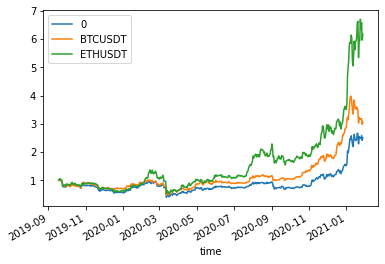

In [68]:
cum_result.plot()

### Test 4

In [45]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [46]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [47]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [48]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [49]:
max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)

In [64]:
signal.sum()

BTCUSDT    258
ETHUSDT    240
dtype: int64

In [50]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [51]:
result = pd.concat([port_ret,ret_df],axis=1)

In [53]:
result.corr()

,0,BTCUSDT,ETHUSDT
0,1.000000,0.894742,0.907552
BTCUSDT,0.894742,1.000000,0.821696
ETHUSDT,0.907552,0.821696,1.000000


In [54]:
port_ret = port_ret - ret_df["BTCUSDT"]

In [55]:
port_cum_ret = (port_ret+1).cumprod()

<AxesSubplot:xlabel='time'>

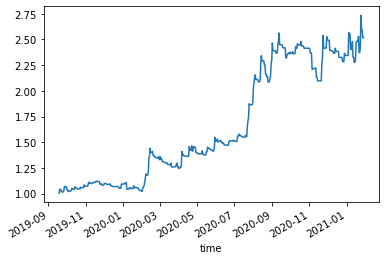

In [56]:
port_cum_ret.plot()

In [57]:
port_ret.mean()/port_ret.std()

0.10132101472263345

In [58]:
result = pd.concat([port_ret,ret_df],axis=1)

In [59]:
result.columns = ["port_ret","BTCUSDT","ETHUSDT"]

In [60]:
result.corr()

,port_ret,BTCUSDT,ETHUSDT
port_ret,1.000000,0.059453,0.434090
BTCUSDT,0.059453,1.000000,0.821696
ETHUSDT,0.434090,0.821696,1.000000


### Test 5

In [28]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [29]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [30]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [31]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [32]:
max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)

In [33]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [34]:
port_ret = port_ret - (ret_df["BTCUSDT"]*0.6 + ret_df["ETHUSDT"]*0.4)

In [35]:
port_cum_ret = (port_ret+1).cumprod()

<AxesSubplot:xlabel='time'>

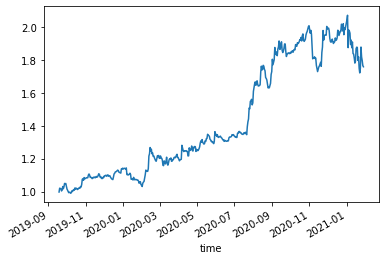

In [36]:
port_cum_ret.plot()

In [37]:
result = pd.concat([port_ret,ret_df],axis=1)

In [38]:
result.columns = ["port_ret","BTCUSDT","ETHUSDT"]

In [39]:
result.corr()

,port_ret,BTCUSDT,ETHUSDT
port_ret,1.000000,-0.012301,0.059210
BTCUSDT,-0.012301,1.000000,0.821696
ETHUSDT,0.059210,0.821696,1.000000


### Test 6

In [17]:
df = pd.read_csv("data/usdt_pairs.csv")
df = df.iloc[:,1:]
df["time"] = pd.to_datetime(df["time"])

In [18]:
df = df[df["ticker"].isin(["BTCUSDT","ETHUSDT"])]
wide_df = df.pivot_table(columns=["ticker"],index=["time"],values=["close"])

In [19]:
signal_df = wide_df.pct_change(1).shift(1)
ret_df = wide_df.pct_change(1)

In [20]:
signal_df.columns = ["BTCUSDT","ETHUSDT"]
ret_df.columns = ["BTCUSDT","ETHUSDT"]

In [21]:
max_daily_ret = signal_df.max(axis=1)

def check(x):
    
    signal = x == max_daily_ret
    return signal


signal = signal_df.apply(check)

In [22]:
port_ret = ret_df[signal].fillna(0)
port_ret = port_ret.sum(axis=1)

In [23]:
min_daily_ret = signal_df.min(axis=1)

def check(x):
    
    signal = x == min_daily_ret
    return signal


signal = signal_df.apply(check)

In [24]:
counter_ret = ret_df[signal].fillna(0)
counter_ret = counter_ret.sum(axis=1)

In [25]:
port_ret = port_ret - counter_ret

In [26]:
result = pd.concat([port_ret,ret_df],axis=1)

In [27]:
result.columns = ["port_ret","BTCUSDT","ETHUSDT"]

In [28]:
result.corr()

,port_ret,BTCUSDT,ETHUSDT
port_ret,1.000000,-0.035690,-0.072847
BTCUSDT,-0.035690,1.000000,0.821696
ETHUSDT,-0.072847,0.821696,1.000000


In [29]:
result_cum = (result + 1).cumprod()

<AxesSubplot:xlabel='time'>

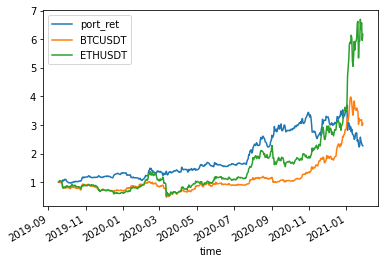

In [30]:
result_cum.plot()

<AxesSubplot:xlabel='time'>

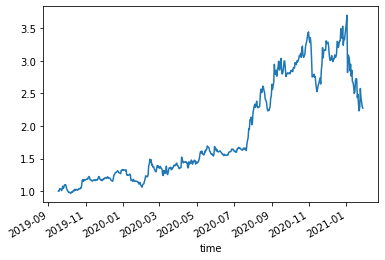

In [31]:
result_cum["port_ret"].plot()